## Introduction

House sale prices are determined by a lot of factors, and some of them are important while others relatively not. Here in this study I will use regularization methods to prevent overfitting and give a better prediction of house sale prices.

## Data Description

Data source: [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) You can click the link for further details of the data.

#### Acknowledgement

Data cleaning process is based on the methods provided by [juliencs](https://www.kaggle.com/juliencs/a-study-on-regression-applied-to-the-ames-dataset) since we mainly focus on regularization regressions in this report instead of tedious data cleaning.

For the original and clean data, please click here.

## Data Preprocessing

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import skew

In [27]:
train = pd.read_csv("C:/Documents/Data Analysis/Assignments4/house-prices-advanced-regression-techniques/train.csv")
print("train : " + str(train.shape))

train : (1460, 81)


In [28]:
# Check for duplicates
idsUnique = len(set(train.Id))
idsTotal = train.shape[0]
idsDupli = idsTotal - idsUnique
print("There are " + str(idsDupli) + " duplicate IDs for " + str(idsTotal) + " total entries")

# Drop Id column
train.drop("Id", axis = 1, inplace = True)

There are 0 duplicate IDs for 1460 total entries


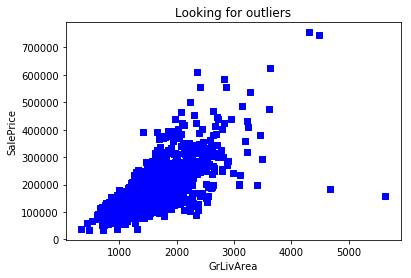

In [29]:
# Looking for outliers
plt.scatter(train.GrLivArea, train.SalePrice, c = "blue", marker = "s")
plt.title("Looking for outliers")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

train = train[train.GrLivArea < 4000]

In [30]:
# Handle missing values for features where median/mean or most common value doesn't make sense

# Alley : data description says NA means "no alley access"
train.loc[:, "Alley"] = train.loc[:, "Alley"].fillna("None")
# BedroomAbvGr : NA most likely means 0
train.loc[:, "BedroomAbvGr"] = train.loc[:, "BedroomAbvGr"].fillna(0)
# BsmtQual etc : data description says NA for basement features is "no basement"
train.loc[:, "BsmtQual"] = train.loc[:, "BsmtQual"].fillna("No")
train.loc[:, "BsmtCond"] = train.loc[:, "BsmtCond"].fillna("No")
train.loc[:, "BsmtExposure"] = train.loc[:, "BsmtExposure"].fillna("No")
train.loc[:, "BsmtFinType1"] = train.loc[:, "BsmtFinType1"].fillna("No")
train.loc[:, "BsmtFinType2"] = train.loc[:, "BsmtFinType2"].fillna("No")
train.loc[:, "BsmtFullBath"] = train.loc[:, "BsmtFullBath"].fillna(0)
train.loc[:, "BsmtHalfBath"] = train.loc[:, "BsmtHalfBath"].fillna(0)
train.loc[:, "BsmtUnfSF"] = train.loc[:, "BsmtUnfSF"].fillna(0)
# CentralAir : NA most likely means No
train.loc[:, "CentralAir"] = train.loc[:, "CentralAir"].fillna("N")
# Condition : NA most likely means Normal
train.loc[:, "Condition1"] = train.loc[:, "Condition1"].fillna("Norm")
train.loc[:, "Condition2"] = train.loc[:, "Condition2"].fillna("Norm")
# EnclosedPorch : NA most likely means no enclosed porch
train.loc[:, "EnclosedPorch"] = train.loc[:, "EnclosedPorch"].fillna(0)
# External stuff : NA most likely means average
train.loc[:, "ExterCond"] = train.loc[:, "ExterCond"].fillna("TA")
train.loc[:, "ExterQual"] = train.loc[:, "ExterQual"].fillna("TA")
# Fence : data description says NA means "no fence"
train.loc[:, "Fence"] = train.loc[:, "Fence"].fillna("No")
# FireplaceQu : data description says NA means "no fireplace"
train.loc[:, "FireplaceQu"] = train.loc[:, "FireplaceQu"].fillna("No")
train.loc[:, "Fireplaces"] = train.loc[:, "Fireplaces"].fillna(0)
# Functional : data description says NA means typical
train.loc[:, "Functional"] = train.loc[:, "Functional"].fillna("Typ")
# GarageType etc : data description says NA for garage features is "no garage"
train.loc[:, "GarageType"] = train.loc[:, "GarageType"].fillna("No")
train.loc[:, "GarageFinish"] = train.loc[:, "GarageFinish"].fillna("No")
train.loc[:, "GarageQual"] = train.loc[:, "GarageQual"].fillna("No")
train.loc[:, "GarageCond"] = train.loc[:, "GarageCond"].fillna("No")
train.loc[:, "GarageArea"] = train.loc[:, "GarageArea"].fillna(0)
train.loc[:, "GarageCars"] = train.loc[:, "GarageCars"].fillna(0)
# HalfBath : NA most likely means no half baths above grade
train.loc[:, "HalfBath"] = train.loc[:, "HalfBath"].fillna(0)
# HeatingQC : NA most likely means typical
train.loc[:, "HeatingQC"] = train.loc[:, "HeatingQC"].fillna("TA")
# KitchenAbvGr : NA most likely means 0
train.loc[:, "KitchenAbvGr"] = train.loc[:, "KitchenAbvGr"].fillna(0)
# KitchenQual : NA most likely means typical
train.loc[:, "KitchenQual"] = train.loc[:, "KitchenQual"].fillna("TA")
# LotFrontage : NA most likely means no lot frontage
train.loc[:, "LotFrontage"] = train.loc[:, "LotFrontage"].fillna(0)
# LotShape : NA most likely means regular
train.loc[:, "LotShape"] = train.loc[:, "LotShape"].fillna("Reg")
# MasVnrType : NA most likely means no veneer
train.loc[:, "MasVnrType"] = train.loc[:, "MasVnrType"].fillna("None")
train.loc[:, "MasVnrArea"] = train.loc[:, "MasVnrArea"].fillna(0)
# MiscFeature : data description says NA means "no misc feature"
train.loc[:, "MiscFeature"] = train.loc[:, "MiscFeature"].fillna("No")
train.loc[:, "MiscVal"] = train.loc[:, "MiscVal"].fillna(0)
# OpenPorchSF : NA most likely means no open porch
train.loc[:, "OpenPorchSF"] = train.loc[:, "OpenPorchSF"].fillna(0)
# PavedDrive : NA most likely means not paved
train.loc[:, "PavedDrive"] = train.loc[:, "PavedDrive"].fillna("N")
# PoolQC : data description says NA means "no pool"
train.loc[:, "PoolQC"] = train.loc[:, "PoolQC"].fillna("No")
train.loc[:, "PoolArea"] = train.loc[:, "PoolArea"].fillna(0)
# SaleCondition : NA most likely means normal sale
train.loc[:, "SaleCondition"] = train.loc[:, "SaleCondition"].fillna("Normal")
# ScreenPorch : NA most likely means no screen porch
train.loc[:, "ScreenPorch"] = train.loc[:, "ScreenPorch"].fillna(0)
# TotRmsAbvGrd : NA most likely means 0
train.loc[:, "TotRmsAbvGrd"] = train.loc[:, "TotRmsAbvGrd"].fillna(0)
# Utilities : NA most likely means all public utilities
train.loc[:, "Utilities"] = train.loc[:, "Utilities"].fillna("AllPub")
# WoodDeckSF : NA most likely means no wood deck
train.loc[:, "WoodDeckSF"] = train.loc[:, "WoodDeckSF"].fillna(0)

In [31]:
# Differentiate numerical features (minus the target) and categorical features
categorical_features = train.select_dtypes(include = ["object"]).columns
numerical_features = train.select_dtypes(exclude = ["object"]).columns
# numerical_features = numerical_features.drop("SalePrice")
print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))
train_num = train[numerical_features]
train_cat = train[categorical_features]

Numerical features : 37
Categorical features : 43


In [32]:
# Handle remaining missing values for numerical features by using median as replacement
print("NAs for numerical features in train : " + str(train_num.isnull().values.sum()))
train_num = train_num.fillna(train_num.median())
print("Remaining NAs for numerical features in train : " + str(train_num.isnull().values.sum()))

NAs for numerical features in train : 81
Remaining NAs for numerical features in train : 0


In [35]:
# Log transform of the skewed numerical features to lessen impact of outliers
# Inspired by Alexandru Papiu's script : https://www.kaggle.com/apapiu/house-prices-advanced-regression-techniques/regularized-linear-models
# As a general rule of thumb, a skewness with an absolute value > 0.5 is considered at least moderately skewed
skewness = train_num.apply(lambda x: skew(x))
skewness = skewness[abs(skewness) > 0.5]
print(str(skewness.shape[0]) + " skewed numerical features to log transform")
skewed_features = skewness.index
train_num[skewed_features] = np.log1p(train_num[skewed_features])

27 skewed numerical features to log transform


In [36]:
# Create dummy features for categorical values via one-hot encoding
print("NAs for categorical features in train : " + str(train_cat.isnull().values.sum()))
train_cat_dummy = pd.get_dummies(train_cat)
print("Remaining NAs for categorical features in train : " + str(train_cat_dummy.isnull().values.sum()))

NAs for categorical features in train : 1
Remaining NAs for categorical features in train : 0


In [37]:
# Join categorical and numerical features
df_clean = pd.concat([train_num, train_cat_dummy], axis = 1)
print("New number of features : " + str(df_clean.shape[1]))
print("Clean Data : " + str(df_clean.shape))

New number of features : 301
Clean Data : (1456, 301)


## Modeling

In [38]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import (LinearRegression, Ridge, Lasso, RandomizedLasso)
from sklearn.metrics import mean_squared_error, make_scorer

In [39]:
df = df_clean

In [40]:
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.110874,65.0,9.042040,7,1.791759,7.602900,2003,5.283204,6.561031,0.0,...,0,0,0,1,0,0,0,0,1,0
1,3.044522,80.0,9.169623,6,2.197225,7.589336,1976,0.000000,6.886532,0.0,...,0,0,0,1,0,0,0,0,1,0
2,4.110874,68.0,9.328212,7,1.791759,7.601902,2002,5.093750,6.188264,0.0,...,0,0,0,1,0,0,0,0,1,0
3,4.262680,60.0,9.164401,7,1.791759,7.557995,1970,0.000000,5.379897,0.0,...,0,0,0,1,1,0,0,0,0,0
4,4.110874,84.0,9.565284,8,1.791759,7.601402,2000,5.860786,6.486161,0.0,...,0,0,0,1,0,0,0,0,1,0


In [41]:
y=df.SalePrice
df=df.drop(columns=['SalePrice'])
# split into training and testing data
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=0)

#### Linear Regression as Benchmark

In [42]:
lr=LinearRegression()
lr.fit(x_train, y_train)
print('Accuracy of linear regression on train set: {:.4f}'.format(lr.score(x_train, y_train)))
print('Accuracy of linear regression on test set: {:.4f}'.format(lr.score(x_test, y_test)))

Accuracy of linear regression on train set: 0.9529
Accuracy of linear regression on test set: 0.8995


It can be clearly seen that linear regression fits the training data pretty well, but it performs relatively bad on testing data. 

The linear regression might be overfitting.

#### Ridge Regression

In [43]:
rr=Ridge(alpha=5)
rr.fit(x_train,y_train)
print('Accuracy of linear regression on train set: {:.4f}'.format(rr.score(x_train, y_train)))
print('Accuracy of linear regression on test set: {:.4f}'.format(rr.score(x_test, y_test)))

Accuracy of linear regression on train set: 0.9448
Accuracy of linear regression on test set: 0.9223


Ridge Regression gives penalty to add more variables so that it shrinks the parameters of non-important variables.
We can see that accuracy on test set is significantly increased, which means that overfitting problem is reduced to certain degree.

Following we are going to find the best alpha value for Ridge Regression.

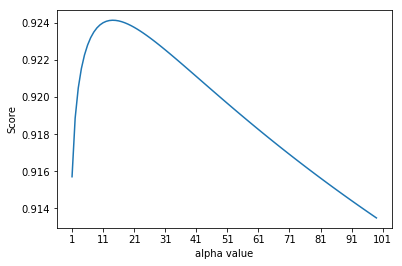

The best alpha value for Ridge: 13
Corresponding accuracy on test set: 0.9241484040760568


In [44]:
scoreList1 = []
for i in range(1,100):
    rr2 = Ridge(alpha = i)  
    rr2.fit(x_train, y_train)
    scoreList1.append(rr2.score(x_test, y_test))

   
plt.plot(range(1,100), scoreList1)
plt.xticks(np.arange(1,110,10))
plt.xlabel("alpha value")
plt.ylabel("Score")
plt.show()

print('The best alpha value for Ridge:',scoreList1.index(max(scoreList1)))
print('Corresponding accuracy on test set:',max(scoreList1))

#### Lasso Regression

In [60]:
lasso=Lasso(alpha=0.0001)
lasso.fit(x_train,y_train)
print('Accuracy of linear regression on train set: {:.4f}'.format(lasso.score(x_train, y_train)))
print('Accuracy of linear regression on test set: {:.4f}'.format(lasso.score(x_test, y_test)))

Accuracy of linear regression on train set: 0.9491
Accuracy of linear regression on test set: 0.9144


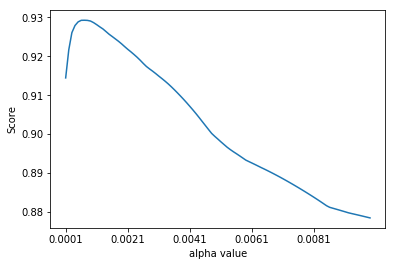

The best alpha value for Lasso: 6 * 0.0001
Corresponding accuracy on test set: 0.9292755070450414


In [68]:
scoreList2 = []
for i in np.arange(0.0001,0.01,0.0001):
    lasso2 = Lasso(alpha = i)  
    lasso2.fit(x_train, y_train)
    scoreList2.append(lasso2.score(x_test, y_test))

   
plt.plot(np.arange(0.0001,0.01,0.0001), scoreList2)
plt.xticks(np.arange(0.0001,0.01,0.002))
plt.xlabel("alpha value")
plt.ylabel("Score")
plt.show()

print("The best alpha value for Lasso: " +str(scoreList2.index(max(scoreList2)))+ " * 0.0001")
print('Corresponding accuracy on test set:',max(scoreList2))

It seems that Lasso does slightly better than Ridge since Lasso raises accuracy by 0.005. 

Unlike Ridge, Lasso does variable selection, which means it directly makes the parameters of non-important variables equal to 0 instead of shrinking. Thus, we wonder how many variables are deleted.

In [64]:
lasso_best=Lasso(alpha=0.0006)
lasso_best.fit(x_train,y_train)
coef = pd.Series(lasso_best.coef_, index = x_train.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and dropped the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 109 variables and dropped the other 191 variables


Almost two third of variables are eliminated, it suggests that the original linear regression is indeed overfitting.

Furthermore, which are exactly important variables selected by Lasso? In other words, what kinds of factors affect house price more?

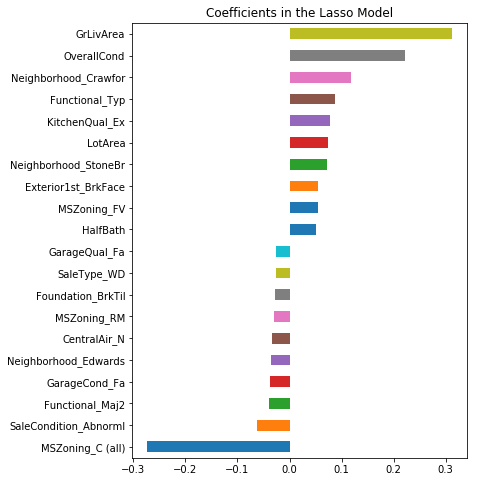

In [69]:
important_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])
important_coef.plot(kind="barh",figsize=(6,8))
plt.title("Coefficients in the Lasso Model")
plt.show()

We can see that the most two important positive variable are `GrLivArea` (Above grade (ground) living area square feet) and `OverallCond` (Rates the overall condition of the house), which totally make sense. The most two important negative factors, `MSZoning_C` (Identifies the general zoning classification of the sale) and `SaleCondition_Abnormal` (Abnormal Sale -  trade, foreclosure, short sale) also have strong explanatory power to house price intuitively.

**In conclusion, regularization methods do improve prediction power of a model by reducing overfitting.**

## Reference

[juliencs--A study on Regression applied to the Ames dataset](https://www.kaggle.com/juliencs/a-study-on-regression-applied-to-the-ames-dataset)

[Alexandru Papiu--Regularized Linear Models](https://www.kaggle.com/apapiu/regularized-linear-models)